In [0]:
!pip install pandas==0.23.4
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 8.9MB 3.1MB/s 
fastai 1.0.49 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0


    100% |████████████████████████████████| 215kB 24.8MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
import os
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",500)

In [2]:
from google.colab import drive

drive.mount('/content/drive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
os.chdir("/content/drive/My Drive/Colab Notebooks/Kaggle/SanFrancisco_Permits")
os.listdir()


['Learn_SanFrancisco_permit.ipynb',
 'DataDictionaryBuildingPermit.xlsx',
 'Building_Permits.csv']

In [4]:
san = pd.read_csv('Building_Permits.csv')
san.head(3)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716


In [0]:
san.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
Permit Number                             198900 non-null object
Permit Type                               198900 non-null int64
Permit Type Definition                    198900 non-null object
Permit Creation Date                      198900 non-null object
Block                                     198900 non-null object
Lot                                       198900 non-null object
Street Number                             198900 non-null int64
Street Number Suffix                      2216 non-null object
Street Name                               198900 non-null object
Street Suffix                             196132 non-null object
Unit                                      29479 non-null float64
Unit Suffix                               1961 non-null object
Description                               198610 non-null object
Current Status                            198900 n

## clean unnecesary columns

In [0]:

san['Street Number Suffix'].unique()


NameError: ignored

In [0]:
san['TIDF Compliance'].unique()


array([nan, 'Y', 'P'], dtype=object)

In [0]:
san['Voluntary Soft-Story Retrofit'].unique()


array([nan, 'Y'], dtype=object)

In [0]:
san['Unit Suffix'].unique()

array([nan, 'A', 'D', 'BLDG 1', 'C', 'B', 'E', 'FRONT', 'F', 'COMML',
       'HOA', 'L', 'B20H', 'COMMERCIAL', "RES'L", 'UPPER', 'G', 'H',
       "RESID'L", 'FRONT BLDG', 'RETAIL 1', 'RESIDL 3/F', 'P',
       'OFFICE 2/F', 'BLDG E', 'BLDG D', 'BLDG C', 'BLDG B', 'BLDG A',
       'PIER 3', 'PIER 2', 'PIER 1', 'J', 'PH-4', 'RESIDENCE', 'C132',
       'REAR UNIT', 'FRONT UNIT', 'REAR', 'LOWER', 'PH2B', 'RESIDENTIA',
       'W', 'REAR BLDG', 'PH', '#R-2', '1A-4', 'THEATRE', 'BLDG. 3',
       'RESDL/REAR', 'T', 'N', 'UTILITY', 'BLDG 3', 'O', 'LOWER UNIT',
       'FRNT RIGHT', 'MIDDLE', 'STORE', 'R', '1/F', '2/F', 'REAR G/F',
       'BLDG 449', "COM'L 1/F", 'CU-3', 'PH-1', 'FRNT BLDG', 'K',
       'LEAS OFFIC', 'COMML-3', 'S', 'M', 'PH1C', "COM'L", 'LEVEL 4',
       'BLD 7', '1503B', 'BLDG 3F', 'TENTATIVE', 'C1', 'CHILD DEV',
       'BASEMENT', '3/F', 'CU-2', 'C102', 'EAST', 'WEST', 'UPPER UNIT',
       'Garage', '0', 'COMML-2', '-A', '-B', 'FRNT ENTRA', 'C-4', 'A102',
       'BLDG 3E', '1ST

In [0]:
san['Unit'].unique()

array([      nan, 0.000e+00, 3.010e+02, 1.000e+00, 2.010e+02, 1.007e+03,
       4.010e+02, 5.100e+02, 7.260e+02, 3.412e+03, 1.400e+01, 1.020e+02,
       2.090e+02, 3.070e+02, 5.010e+02, 3.700e+01, 1.900e+01, 2.000e+00,
       2.200e+01, 1.010e+02, 2.900e+01, 2.900e+03, 2.470e+02, 4.190e+02,
       1.202e+03, 1.006e+03, 2.300e+01, 4.000e+00, 2.700e+01, 5.030e+02,
       6.010e+02, 7.010e+02, 2.410e+02, 5.020e+02, 1.060e+02, 2.080e+02,
       1.120e+02, 1.000e+01, 1.100e+01, 8.000e+00, 5.602e+03, 3.140e+02,
       1.024e+03, 3.000e+00, 2.040e+02, 4.500e+01, 1.432e+03, 4.100e+02,
       3.040e+02, 7.000e+00, 7.230e+02, 6.070e+02, 1.200e+01, 3.020e+02,
       2.020e+02, 3.030e+02, 2.030e+02, 4.020e+02, 4.030e+02, 4.040e+02,
       2.203e+03, 1.701e+03, 1.700e+01, 6.000e+00, 9.070e+02, 4.060e+02,
       1.608e+03, 1.605e+03, 1.030e+02, 1.201e+03, 6.020e+02, 2.110e+02,
       2.500e+01, 5.000e+00, 1.106e+03, 1.602e+03, 1.600e+01, 9.000e+00,
       3.060e+02, 1.002e+03, 3.390e+02, 9.020e+02, 

In [0]:
san['Site Permit'].unique()

array([nan, 'Y'], dtype=object)

In [0]:
#File without unnecessary columns
san_new = san.drop(columns = ['Street Number Suffix', 'TIDF Compliance', 'Unit Suffix', 'Unit', 'Voluntary Soft-Story Retrofit', 'Record ID', 'Location',
                              'Zipcode', 'Neighborhoods - Analysis Boundaries', 'Supervisor District', 'Filed Date', 'Issued Date', 'Permit Expiration Date'])



san_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 30 columns):
Permit Number                             198900 non-null object
Permit Type                               198900 non-null int64
Permit Type Definition                    198900 non-null object
Permit Creation Date                      198900 non-null object
Block                                     198900 non-null object
Lot                                       198900 non-null object
Street Number                             198900 non-null int64
Street Name                               198900 non-null object
Street Suffix                             196132 non-null object
Description                               198610 non-null object
Current Status                            198900 non-null object
Current Status Date                       198900 non-null object
Completed Date                            97191 non-null object
First Construction Document Date          18395

##Handle with NaN values


In [0]:
san_new[['Existing Construction Type', 'Existing Construction Type Description','Permit Type Definition', 'Description']].head(10)

,Existing Construction Type,Existing Construction Type Description,Permit Type Definition,Description
0,3.0,constr type 3,sign - erect,"ground fl facade: to erect illuminated, electr..."
1,3.0,constr type 3,sign - erect,remove (e) awning and associated signs.
2,1.0,constr type 1,additions alterations or repairs,installation of separating wall
3,5.0,wood frame (5),otc alterations permit,repair dryrot & stucco at front of bldg.
4,3.0,constr type 3,demolitions,demolish retail/office/commercial 3-story buil...
5,1.0,constr type 1,otc alterations permit,evac maps
6,5.0,wood frame (5),otc alterations permit,re-roofing
7,NaN,NaN,otc alterations permit,streetspace
8,NaN,NaN,otc alterations permit,street space permit
9,NaN,NaN,otc alterations permit,street space


In [0]:
#Most values without 'Existing Construction Type' are permit for use the street space
a = san_new[["Description","Existing Construction Type Description", "Permit Type Definition"]].loc[(san_new['Existing Construction Type Description'].isnull())]
a
                                                                     

,Description,Existing Construction Type Description,Permit Type Definition
7,streetspace,NaN,otc alterations permit
8,street space permit,NaN,otc alterations permit
9,street space,NaN,otc alterations permit
10,street space,NaN,otc alterations permit
11,street space,NaN,otc alterations permit
12,street space,NaN,otc alterations permit
14,street space,NaN,otc alterations permit
15,street space,NaN,otc alterations permit
16,street space permit,NaN,otc alterations permit
17,street space & sidewalk repair,NaN,otc alterations permit


In [0]:
a["Permit Type Definition"].value_counts()

otc alterations permit                 40675
new construction wood frame              949
additions alterations or repairs         745
wall or painted sign                     508
new construction                         349
grade or quarry or fill or excavate       91
sign - erect                              42
demolitions                                7
Name: Permit Type Definition, dtype: int64

In [0]:
a['Description'].value_counts()

street space                                                                                                                                                                                                                                                                   22161
street space permit                                                                                                                                                                                                                                                             7549
streetspace                                                                                                                                                                                                                                                                      819
street space & sidewalk repair                                                                                                                                           

In [0]:
# a.loc[(a["Description"]=="street space")|(a["Description"]=="street space permit")|(a["Description"]=="street space & sidewalk repair")]

In [0]:
b = a.loc[a["Description"].str.contains("street|sidewalk")==False]
b['Description'].value_counts()

#To facilitate analisys, it was eliminated all values with NaN in 'Existing Construction Type Description'

reroofing                                                                                                                                                                                                                                                                                                    285
erect 3-story, type 5-b, no basement, single family dwelling.                                                                                                                                                                                                                                                 40
streeet space                                                                                                                                                                                                                                                                                                 37
re-roofing                                                                           

In [0]:
#File without rows that have NaN value in "Existing Consruction Type" - TOTAL=155.534
san_new_1 = san_new.dropna(subset = ["Existing Construction Type Description"])

# df = df[df.line_race != 0]
# san_new_1 = san_new.loc[san_new["Description"].str.contains("street|sidewalk")==False]

# drop([san_new["Description"].str.contains("street|sidewalk")==True], axis=0)
san_new_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155534 entries, 0 to 198896
Data columns (total 30 columns):
Permit Number                             155534 non-null object
Permit Type                               155534 non-null int64
Permit Type Definition                    155534 non-null object
Permit Creation Date                      155534 non-null object
Block                                     155534 non-null object
Lot                                       155534 non-null object
Street Number                             155534 non-null int64
Street Name                               155534 non-null object
Street Suffix                             153322 non-null object
Description                               155458 non-null object
Current Status                            155534 non-null object
Current Status Date                       155534 non-null object
Completed Date                            94960 non-null object
First Construction Document Date          14265

### Columns with NaN that means NO (Yes/No)
#### - Fire Only Permit
#### - Site Permit
#### - Structural Notification

In [0]:
san_new_1['Fire Only Permit'].unique()

array([nan, 'Y'], dtype=object)

In [0]:
san_new_1['Site Permit'].unique()

array([nan, 'Y'], dtype=object)

In [0]:
san_new_1['Structural Notification'].unique()

array([nan, 'Y'], dtype=object)

In [0]:
# Fill NaN with "N"
san_new_2 = san_new_1
san_new_2[['Structural Notification', 'Site Permit','Fire Only Permit']] = san_new_2[['Structural Notification', 'Site Permit','Fire Only Permit']].fillna('N')
# san_new_2['Site Permit'].fillna('N')
# san_new_2['Fire Only Permit'].fillna('N')
                      
#                       'Fire Only Permit', 'Site Permit'].fillna('N
# san_new_2.info()
san_new_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155534 entries, 0 to 198896
Data columns (total 30 columns):
Permit Number                             155534 non-null object
Permit Type                               155534 non-null int64
Permit Type Definition                    155534 non-null object
Permit Creation Date                      155534 non-null object
Block                                     155534 non-null object
Lot                                       155534 non-null object
Street Number                             155534 non-null int64
Street Name                               155534 non-null object
Street Suffix                             153322 non-null object
Description                               155458 non-null object
Current Status                            155534 non-null object
Current Status Date                       155534 non-null object
Completed Date                            94960 non-null object
First Construction Document Date          14265

##Columns without data - complete with Unknown (cancel)




In [0]:
# san_new_3 = san_new_2
# san_new_3[['Proposed Construction Type Description', 'Proposed Construction Type','Plansets', 'Proposed Use',
#            'Proposed Units', 'Existing Units', 'Existing Use', 'Description', 'Street Suffix']] = san_new_3[['Proposed Construction Type Description', 'Proposed Construction Type','Plansets', 'Proposed Use',
#            'Proposed Units', 'Existing Units', 'Existing Use', 'Description', 'Street Suffix']].fillna('Unknown')
# san_new_3.info()

##Make an analisys only in 'completed' permit process


In [0]:
#Status of the permits
san_new_2['Current Status'].value_counts()

complete       94847
issued         44658
filed          10228
withdrawn       1596
cancelled       1488
expired         1344
approved         674
reinstated       454
suspend          175
revoked           49
plancheck         15
disapproved        2
appeal             2
incomplete         2
Name: Current Status, dtype: int64

In [0]:
#File with only completed permit
san_complete = san_new_2[san_new_2['Current Status'] == 'complete']
san_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94847 entries, 3 to 198893
Data columns (total 30 columns):
Permit Number                             94847 non-null object
Permit Type                               94847 non-null int64
Permit Type Definition                    94847 non-null object
Permit Creation Date                      94847 non-null object
Block                                     94847 non-null object
Lot                                       94847 non-null object
Street Number                             94847 non-null int64
Street Name                               94847 non-null object
Street Suffix                             93487 non-null object
Description                               94840 non-null object
Current Status                            94847 non-null object
Current Status Date                       94847 non-null object
Completed Date                            94847 non-null object
First Construction Document Date          94812 non-null obj

In [0]:
#All values 'Unknown' in 'Completed Date' column are projects that wasn't finished
c = san_new_2[['Completed Date', 'Current Status']].loc[(san_new_2['Completed Date'] == 'Unknown')]
c['Current Status'].unique()

array([], dtype=object)

##Handle with NaN values in completed Permits:
###- Number of Existing Stories
###- Number of Proposed Stories
###- Estimated Cost
###- Revised Cost
###- Street Suffix (replace with 'St.')
###- Description (replace with 'alterations')
###- Existing Use
###- Existing Units
###- First Construction Document Date (few values 0,03% - eliminate)
###- Proposed Use
###- Proposed Units
###- Plansets
###- Proposed Construction Type

In [0]:
#Drop the 35 values NaN of 'First Construction Document Date' column
san_complete_1 = san_complete.dropna(subset = ['First Construction Document Date'])
san_complete_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94812 entries, 3 to 198893
Data columns (total 30 columns):
Permit Number                             94812 non-null object
Permit Type                               94812 non-null int64
Permit Type Definition                    94812 non-null object
Permit Creation Date                      94812 non-null object
Block                                     94812 non-null object
Lot                                       94812 non-null object
Street Number                             94812 non-null int64
Street Name                               94812 non-null object
Street Suffix                             93452 non-null object
Description                               94805 non-null object
Current Status                            94812 non-null object
Current Status Date                       94812 non-null object
Completed Date                            94812 non-null object
First Construction Document Date          94812 non-null obj

In [0]:
san_complete_1['Description'].unique()

array(['repair dryrot & stucco at front of bldg.', 're-roofing',
       'reroofing', ...,
       '(n) accessible ramp at entry (inside bldg). refinish floor & walls with paint and tile. rev to permits 200811196964 and 200903134088',
       'apt m2ph-1e: remove & replace kitchen adn bathroom counters tops, sinks, p-traps to be replaced, exh fan at same location. light shall be h.e. remove and replace (e) switches and outlets. no change on walls or layout.',
       'bathtub & shower tile replacement.'], dtype=object)

In [0]:
san_complete_1[["Description","Number of Proposed Stories", 'Number of Existing Stories', "Permit Type Definition", 'Existing Use', 'Proposed Use']].loc[(san_complete_1['Description']).isnull()]

,Description,Number of Proposed Stories,Number of Existing Stories,Permit Type Definition,Existing Use,Proposed Use
9639,NaN,2.0,2.0,otc alterations permit,1 family dwelling,1 family dwelling
9894,NaN,5.0,5.0,otc alterations permit,artist live/work,artist live/work
13764,NaN,4.0,4.0,otc alterations permit,apartments,apartments
14414,NaN,4.0,4.0,otc alterations permit,1 family dwelling,1 family dwelling
16974,NaN,1.0,1.0,otc alterations permit,printing plant,printing plant
33067,NaN,2.0,2.0,otc alterations permit,retail sales,retail sales
126662,NaN,2.0,2.0,otc alterations permit,1 family dwelling,1 family dwelling


In [0]:
#Because NaN values in 'Description' column have only alterations permits, they were replace by 'alteration'

san_complete_1['Description'] = san_complete_1['Description'].fillna('alterations')
san_complete_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 94812 entries, 3 to 198893
Data columns (total 30 columns):
Permit Number                             94812 non-null object
Permit Type                               94812 non-null int64
Permit Type Definition                    94812 non-null object
Permit Creation Date                      94812 non-null object
Block                                     94812 non-null object
Lot                                       94812 non-null object
Street Number                             94812 non-null int64
Street Name                               94812 non-null object
Street Suffix                             93452 non-null object
Description                               94812 non-null object
Current Status                            94812 non-null object
Current Status Date                       94812 non-null object
Completed Date                            94812 non-null object
First Construction Document Date          94812 non-null obj

In [0]:
san_complete_1['Street Suffix'].unique()

array(['Av', 'St', 'Dr', 'Wy', 'Bl', nan, 'Tr', 'Ln', 'Pl', 'Hy', 'Ct',
       'Rd', 'Pk', 'Al', 'Pz', 'Cr', 'Rw', 'So', 'Sw', 'No'], dtype=object)

In [0]:
san_complete_1[['Street Name', 'Street Number', 'Street Suffix']].loc[(san_complete_1['Street Suffix']).isnull()]

,Street Name,Street Number,Street Suffix
568,Broadway,2901,NaN
961,Broadway,2674,NaN
2164,Embarcadero Center,4,NaN
2239,Mission Bay Blvd North,480,NaN
2245,Mission Bay Blvd North,480,NaN
2290,Mission Bay Blvd North,420,NaN
2413,Embarcadero Center,3,NaN
2524,Embarcadero Center,4,NaN
2799,Broadway,1818,NaN
3346,Broadway,1061,NaN


In [0]:
#Because NaN values in 'Street Suffix' have only streets name, they were replace by 'St'
san_complete_1['Street Suffix'] = san_complete_1['Street Suffix'].fillna('St')
san_complete_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94812 entries, 3 to 198893
Data columns (total 30 columns):
Permit Number                             94812 non-null object
Permit Type                               94812 non-null int64
Permit Type Definition                    94812 non-null object
Permit Creation Date                      94812 non-null object
Block                                     94812 non-null object
Lot                                       94812 non-null object
Street Number                             94812 non-null int64
Street Name                               94812 non-null object
Street Suffix                             94812 non-null object
Description                               94812 non-null object
Current Status                            94812 non-null object
Current Status Date                       94812 non-null object
Completed Date                            94812 non-null object
First Construction Document Date          94812 non-null obj

In [0]:
san_complete_1[['Estimated Cost', 'Revised Cost', 'Permit Type Definition']].loc[(san_complete_1['Revised Cost'].isnull())]

,Estimated Cost,Revised Cost,Permit Type Definition
176043,350000.0,NaN,demolitions


In [0]:
#Because there was only one NaN value of 'Revised Cost' column, it was replaced by the 'Estimated Cost' value
#than the 'Estimated Cost Value' was eliminated, because at this point it only matters one cost per permit
san_complete_1['Revised Cost'] = san_complete_1['Revised Cost'].fillna(san_complete_1['Estimated Cost'])
san_complete_1[['Estimated Cost', 'Revised Cost', 'Permit Type Definition']].loc[(san_complete_1['Revised Cost'] == 350000)]

,Estimated Cost,Revised Cost,Permit Type Definition
799,100000.0,350000.0,otc alterations permit
1140,120000.0,350000.0,additions alterations or repairs
1141,120000.0,350000.0,additions alterations or repairs
2915,350000.0,350000.0,otc alterations permit
3351,350000.0,350000.0,otc alterations permit
3650,350000.0,350000.0,otc alterations permit
8379,350000.0,350000.0,additions alterations or repairs
9051,350000.0,350000.0,additions alterations or repairs
12882,250000.0,350000.0,additions alterations or repairs
12900,350000.0,350000.0,otc alterations permit


In [0]:
san_complete_2 = san_complete_1.drop(columns = 'Estimated Cost')
san_complete_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94812 entries, 3 to 198893
Data columns (total 29 columns):
Permit Number                             94812 non-null object
Permit Type                               94812 non-null int64
Permit Type Definition                    94812 non-null object
Permit Creation Date                      94812 non-null object
Block                                     94812 non-null object
Lot                                       94812 non-null object
Street Number                             94812 non-null int64
Street Name                               94812 non-null object
Street Suffix                             94812 non-null object
Description                               94812 non-null object
Current Status                            94812 non-null object
Current Status Date                       94812 non-null object
Completed Date                            94812 non-null object
First Construction Document Date          94812 non-null obj

In [0]:
san_complete_2[['Proposed Construction Type Description', 'Existing Construction Type Description','Proposed Units', 'Existing Units',
                'Number of Proposed Stories']].loc[(san_complete_2['Proposed Units'] == 0) & (san_complete_2['Existing Units']==0)]

#Because the data in 'Proposed Units' and 'Existing Units' are very wrong and confuse (lots of 0 values). these columns were eliminated


,Proposed Construction Type Description,Existing Construction Type Description,Proposed Units,Existing Units,Number of Proposed Stories
114,wood frame (5),wood frame (5),0.0,0.0,2.0
123,constr type 1,constr type 1,0.0,0.0,23.0
140,wood frame (5),wood frame (5),0.0,0.0,2.0
411,wood frame (5),wood frame (5),0.0,0.0,2.0
513,constr type 1,constr type 1,0.0,0.0,16.0
515,constr type 1,constr type 1,0.0,0.0,16.0
516,constr type 1,constr type 1,0.0,0.0,16.0
527,constr type 2,constr type 2,0.0,0.0,6.0
587,constr type 1,constr type 1,0.0,0.0,11.0
595,constr type 1,constr type 1,0.0,0.0,8.0


In [0]:
san_complete_3 = san_complete_2.drop(columns = ['Proposed Units', 'Existing Units'])
san_complete_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94812 entries, 3 to 198893
Data columns (total 27 columns):
Permit Number                             94812 non-null object
Permit Type                               94812 non-null int64
Permit Type Definition                    94812 non-null object
Permit Creation Date                      94812 non-null object
Block                                     94812 non-null object
Lot                                       94812 non-null object
Street Number                             94812 non-null int64
Street Name                               94812 non-null object
Street Suffix                             94812 non-null object
Description                               94812 non-null object
Current Status                            94812 non-null object
Current Status Date                       94812 non-null object
Completed Date                            94812 non-null object
First Construction Document Date          94812 non-null obj

In [0]:
# #In cases of demolitions, there were none 'Proposed Use' - the NaN values were replaced 
# san_complete_3[['Existing Use',
#                 'Proposed Use',
#                 'Permit Type Definition']].loc[(san_complete_3['Proposed Use'].isnull())&(san_complete_3['Permit Type Definition']=='demolitions')]

,Existing Use,Proposed Use,Permit Type Definition
104,1 family dwelling,NaN,demolitions
1778,1 family dwelling,NaN,demolitions
1787,1 family dwelling,NaN,demolitions
1790,1 family dwelling,NaN,demolitions
1793,1 family dwelling,NaN,demolitions
1794,1 family dwelling,NaN,demolitions
1796,1 family dwelling,NaN,demolitions
2051,auto repairs,NaN,demolitions
2472,storage shed,NaN,demolitions
5700,1 family dwelling,NaN,demolitions


In [0]:
# san_complete_3[["Number of Existing Stories",
#                 "Number of Proposed Stories", 
#                 "Permit Type Definition"]].loc[(san_complete_3['Number of Existing Stories']).isnull()]

,Number of Existing Stories,Number of Proposed Stories,Permit Type Definition
10101,NaN,NaN,otc alterations permit
12632,NaN,NaN,additions alterations or repairs
28427,NaN,NaN,otc alterations permit
36955,NaN,NaN,otc alterations permit
36967,NaN,NaN,otc alterations permit
38641,NaN,NaN,otc alterations permit
89584,NaN,NaN,otc alterations permit
106350,NaN,NaN,otc alterations permit
128218,NaN,NaN,otc alterations permit
132716,NaN,NaN,otc alterations permit


##Resumming the Data - eliminating all NaN rows

In [0]:
# san_complete_final = san_complete_3
san_complete_final = san_complete_3.dropna()
san_complete_final.isna().sum()
san_complete_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93457 entries, 3 to 198893
Data columns (total 27 columns):
Permit Number                             93457 non-null object
Permit Type                               93457 non-null int64
Permit Type Definition                    93457 non-null object
Permit Creation Date                      93457 non-null object
Block                                     93457 non-null object
Lot                                       93457 non-null object
Street Number                             93457 non-null int64
Street Name                               93457 non-null object
Street Suffix                             93457 non-null object
Description                               93457 non-null object
Current Status                            93457 non-null object
Current Status Date                       93457 non-null object
Completed Date                            93457 non-null object
First Construction Document Date          93457 non-null obj

In [0]:
san_complete_final.head(3)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Fire Only Permit,Revised Cost,Existing Use,Proposed Use,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,07/24/2017,07/18/2017,N,2.0,2.0,N,2000.0,1 family dwelling,1 family dwelling,2.0,5.0,wood frame (5),5.0,wood frame (5),N
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,11th,Av,re-roofing,complete,07/12/2017,07/12/2017,06/30/2017,N,3.0,3.0,N,12000.0,apartments,apartments,0.0,5.0,wood frame (5),5.0,wood frame (5),N
48,201710110928,8,otc alterations permit,10/11/2017,5934,020,938,Felton,St,reroofing,complete,10/31/2017,10/31/2017,10/11/2017,N,2.0,2.0,N,14000.0,1 family dwelling,1 family dwelling,0.0,5.0,wood frame (5),5.0,wood frame (5),N


In [0]:
san_complete_final[['Completed Date', 'Permit Creation Date']] = pd.to_datetime(san_complete_final[['Completed Date', 'Permit Creation Date']])
san_complete_final.info()

ValueError: ignored

In [0]:
san_complete_final['Permit Process Time'] = san_complete_final['Completed Date'] - san_complete_final['Permit Creation Date']

TypeError: ignored

##Visual Analisys

In [0]:
san_complete_final.head(3)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Fire Only Permit,Revised Cost,Existing Use,Proposed Use,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,07/24/2017,07/18/2017,N,2.0,2.0,N,2000.0,1 family dwelling,1 family dwelling,2.0,5.0,wood frame (5),5.0,wood frame (5),N
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,11th,Av,re-roofing,complete,07/12/2017,07/12/2017,06/30/2017,N,3.0,3.0,N,12000.0,apartments,apartments,0.0,5.0,wood frame (5),5.0,wood frame (5),N
48,201710110928,8,otc alterations permit,10/11/2017,5934,020,938,Felton,St,reroofing,complete,10/31/2017,10/31/2017,10/11/2017,N,2.0,2.0,N,14000.0,1 family dwelling,1 family dwelling,0.0,5.0,wood frame (5),5.0,wood frame (5),N


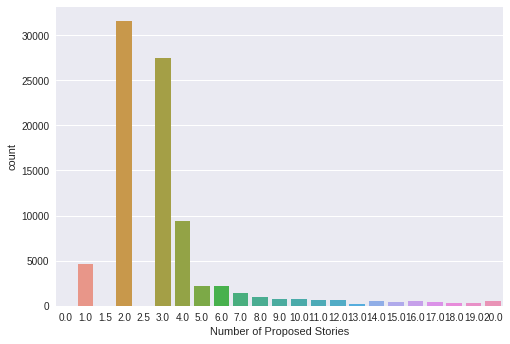

In [0]:
a = san_complete_final.loc[(san_complete_final['Number of Proposed Stories'] <= 20)]
sns.countplot(a['Number of Proposed Stories'])

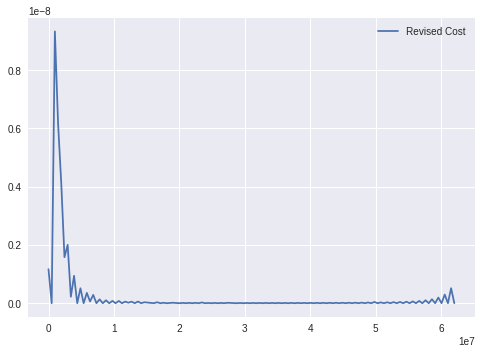

In [0]:
sns.kdeplot(san_complete_final['Revised Cost'], data=san_complete_final)

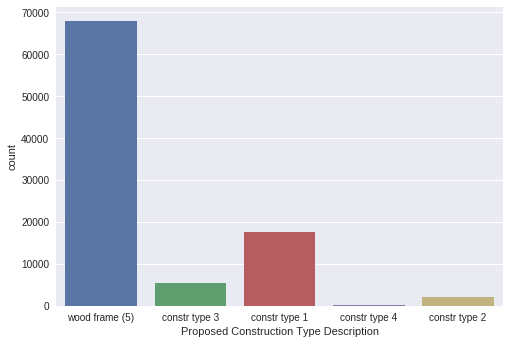

In [0]:
sns.countplot(san_complete_final['Proposed Construction Type Description'])

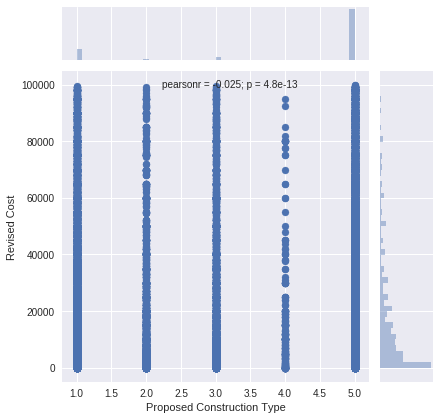

In [0]:
a = san_complete_final.loc[((san_complete_final['Revised Cost']) <100000) & ((san_complete_final['Revised Cost']) != 0) ]
# a.head(2)
sns.jointplot(x=a['Proposed Construction Type'], y=a['Revised Cost']) 

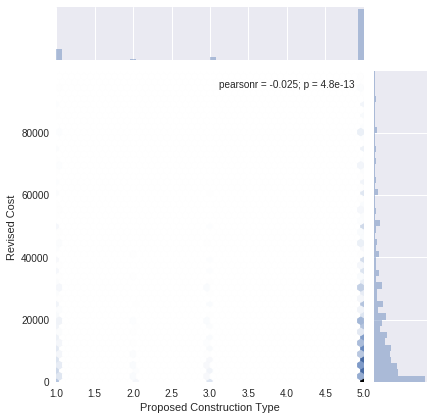

In [0]:
sns.jointplot(x=a['Proposed Construction Type'], y=a['Revised Cost'], kind='hex', gridsize=50) 


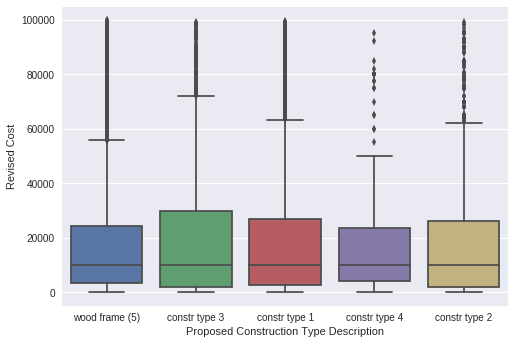

In [0]:
sns.boxplot(x=a['Proposed Construction Type Description'], y=a['Revised Cost']) 


In [0]:
sns.jointplot(x=a['Proposed Construction Type'], y=a['Revised Cost']) 

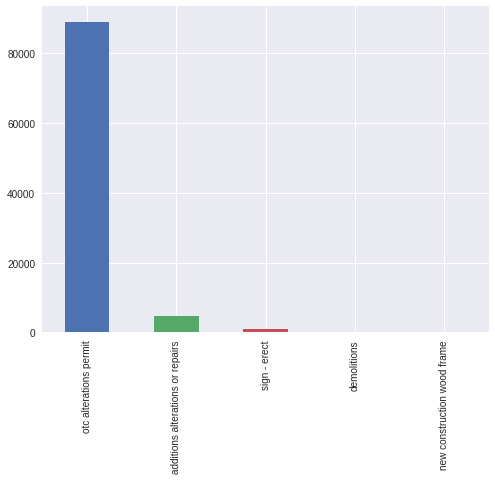

In [0]:

san_complete_1['Permit Type Definition'].value_counts().plot.bar(figsize = (8,6))

TypeError: ignored

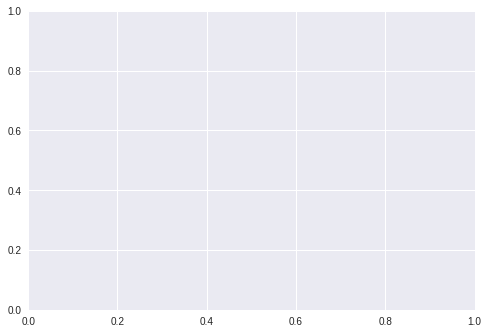

In [0]:
sns.distplot(san_complete_1[san_complete_1['Estimated Cost'] < 2000], bins = 10)
# san_complete_1['Estimated Cost'].value_counts().plot.hist(figsize = (12,6), bins = 10)